<a href="https://colab.research.google.com/github/GargiGhosh03/Project-4-Iris-Classification/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install pydantic-settings


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isna().sum().sum()

0

In [ ]:
Species = data['Species'].value_counts().reset_index()
Species

,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


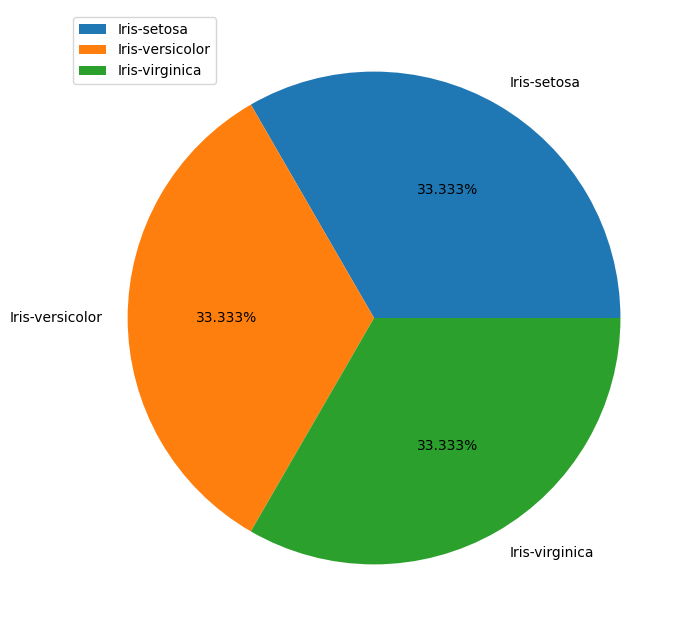

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


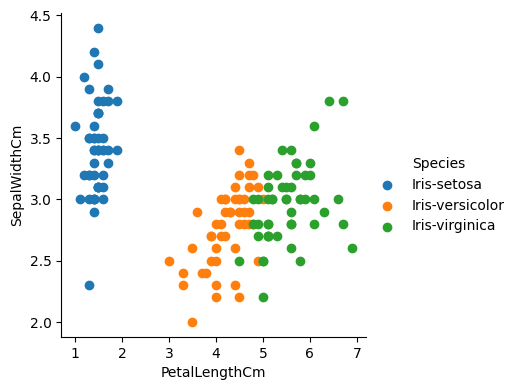

In [ ]:
# Check if 'petal_length' and 'sepal_width' are present in your DataFrame
print(data.columns)

# Fix the column names if there are typos
sns.FacetGrid(data, hue='Species', height=4).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()
plt.show()

# Rename the 'Species' DataFrame to avoid overwriting the Species function
species_counts = data['Species'].value_counts().reset_index()

**Preprocessing**

In [ ]:
X = data.drop('Species', axis =1)
y = data['Species']

In [ ]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

X

array([[0.        , 0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.00671141, 0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.01342282, 0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.02013423, 0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.02684564, 0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.03355705, 0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.04026846, 0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.04697987, 0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.05369128, 0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.06040268, 0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.06711409, 0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.0738255 , 0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.08053691, 0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.08724832, 0.        , 0.41666667, 0.01694915, 0.        ],
       [0.09395973, 0.41666667, 0.

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

**Models**

In [ ]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)

  accuracy = accuracy_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print('Accuracy : ',accuracy)

In [ ]:
model_LR = LogisticRegression()

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  1.0


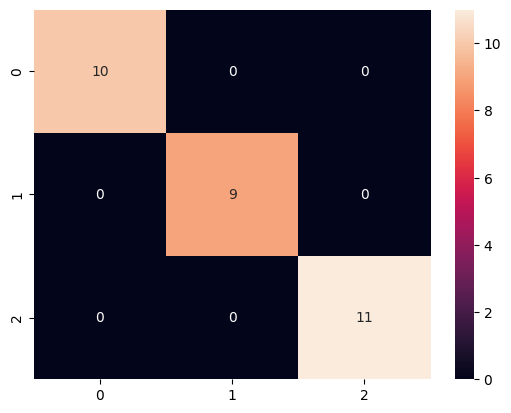

In [ ]:
lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42)
lsr_clf = lsr_best.fit(X_train,y_train)
evaluate(lsr_clf)

In [ ]:
model_KNN = KNeighborsClassifier()

In [ ]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

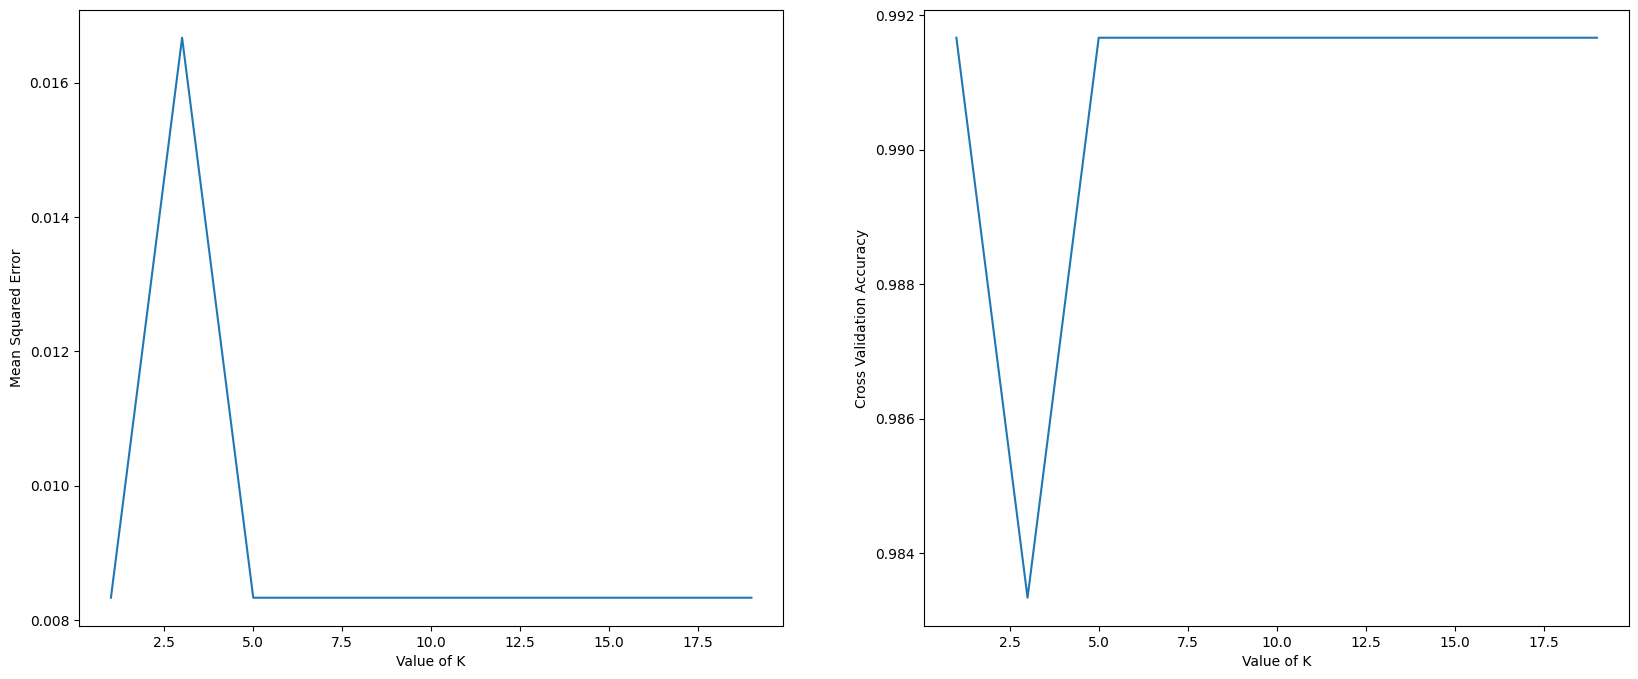

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

KNeighborsClassifier(n_neighbors=7)
Accuracy :  1.0


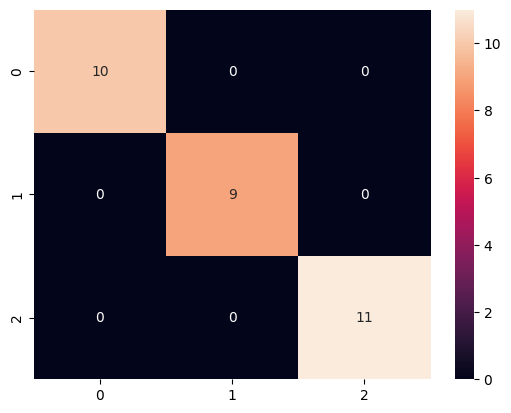

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf)

In [ ]:
model_RFC = RandomForestClassifier()

RandomForestClassifier(max_depth=9, n_estimators=50)
Accuracy :  1.0


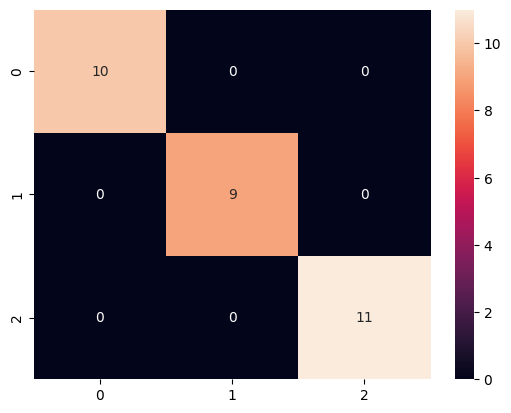

In [ ]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf)

In [ ]:
model_SVM = SVC()

SVC()
Accuracy :  1.0


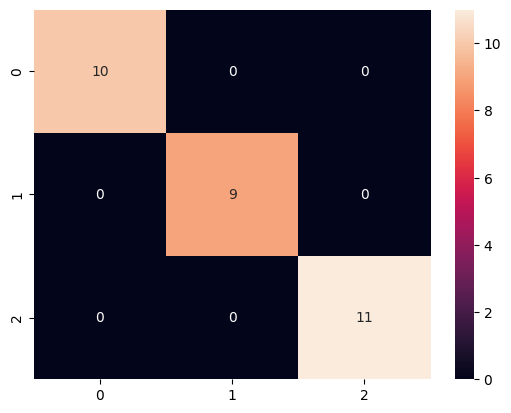

In [ ]:
svc = SVC()
svc_clf = svc.fit(X_train, y_train)
evaluate(svc_clf)

In [ ]:
model_DT = DecisionTreeClassifier()

SVC()
Accuracy :  1.0


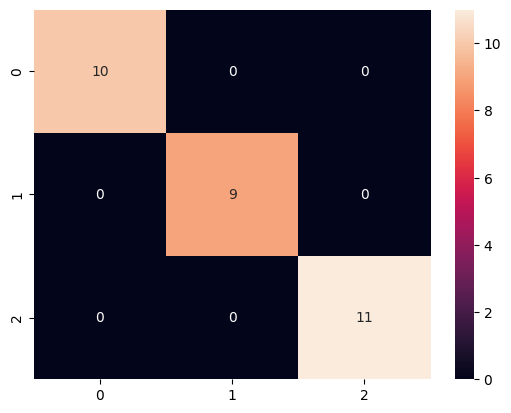

In [ ]:
DT = model_DT.fit(X_train, y_train)
evaluate(svc_clf)

In [ ]:
model_ANN = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),

    Dense(64, activation='relu'),

    Dense(32, activation='relu'),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(3, activation='softmax')
])

model_ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 11795 (46.07 KB)
Trainable params: 11795 (

In [ ]:
history = model_ANN.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 6s 380ms/step - loss: 1.1112 - accuracy: 0.3646 - val_loss: 1.1124 - val_accuracy: 0.2083
Epoch 2/50
3/3 [==============================] - 0s 35ms/step - loss: 1.0894 - accuracy: 0.3646 - val_loss: 1.0952 - val_accuracy: 0.2083
Epoch 3/50
3/3 [==============================] - 0s 50ms/step - loss: 1.0734 - accuracy: 0.3750 - val_loss: 1.0839 - val_accuracy: 0.2083
Epoch 4/50
3/3 [==============================] - 0s 42ms/step - loss: 1.0605 - accuracy: 0.4896 - val_loss: 1.0742 - val_accuracy: 0.3750
Epoch 5/50
3/3 [==============================] - 0s 59ms/step - loss: 1.0433 - accuracy: 0.6458 - val_loss: 1.0666 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 50ms/step - loss: 1.0233 - accuracy: 0.7083 - val_loss: 1.0570 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 60ms/step - loss: 0.9999 - accuracy: 0.7083 - val_loss: 1.0384 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

In [ ]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

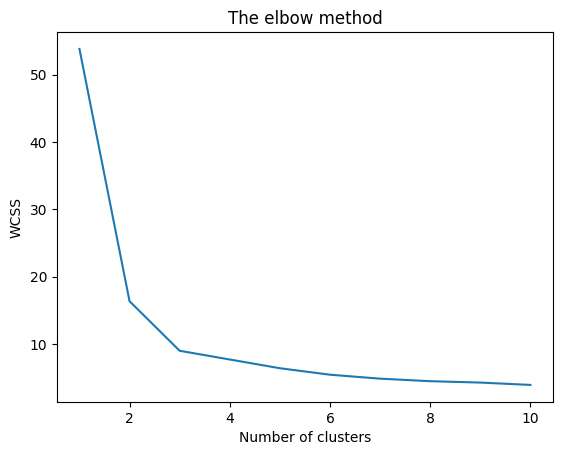

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

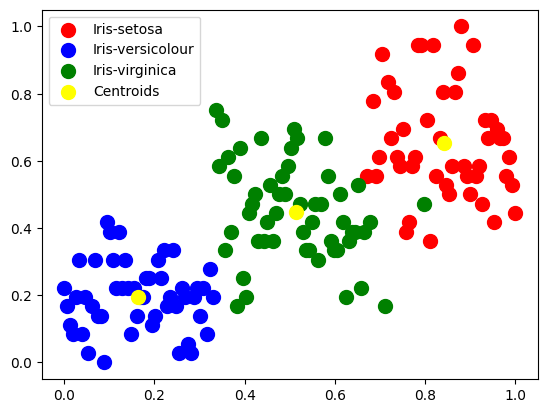

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()